In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [64]:
df = pd.read_csv('Pokemon.csv')
df.sample(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False
404,369,Relicanth,Water,Rock,485,100,90,130,45,65,55,3,False
634,573,Cinccino,Normal,NaN,470,75,95,60,65,60,115,5,False
704,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True


In [65]:
df['Legendary'].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

In [66]:
df['Generation'].value_counts().sort_index()

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: count, dtype: int64

<Axes: xlabel='Generation', ylabel='Attack'>

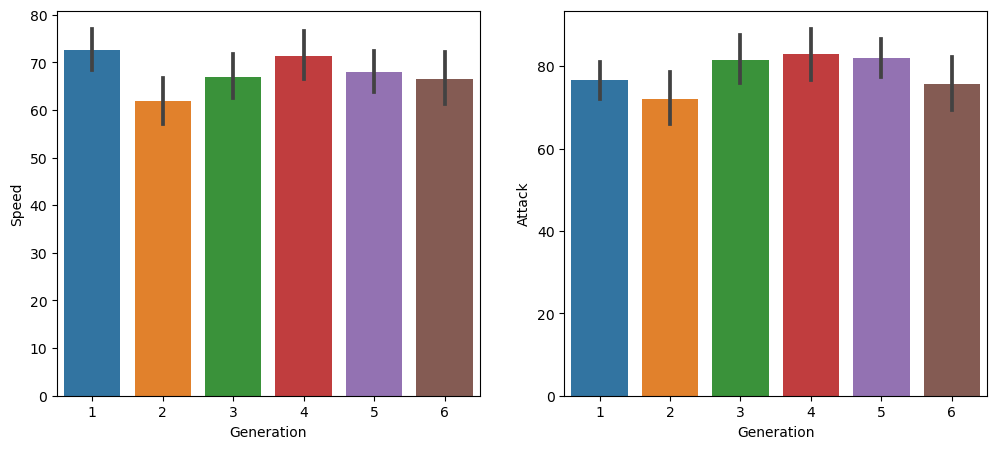

In [67]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=df['Generation'],y=df['Speed'])

plt.subplot(1,2,2)
sns.barplot(x=df['Generation'],y=df['Attack'])

In [68]:
l= len(df[df['Generation'] == 5])
l

165

In [69]:
max_defense = df['Defense'].max()

# Count the number of Pokémon with the highest defense score
pokemon_highest_defense_count = len(df[df['Defense'] == max_defense])

print(pokemon_highest_defense_count)

3


In [70]:
df = df.astype('object')

In [71]:
df = df.drop('#',axis=1)

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
for i in df:
    if df[i].dtype == 'object':
        df[i]=le.fit_transform(df[i])
        

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Name        800 non-null    int32
 1   Type 1      800 non-null    int32
 2   Type 2      800 non-null    int32
 3   Total       800 non-null    int32
 4   HP          800 non-null    int32
 5   Attack      800 non-null    int32
 6   Defense     800 non-null    int32
 7   Sp. Atk     800 non-null    int32
 8   Sp. Def     800 non-null    int32
 9   Speed       800 non-null    int32
 10  Generation  800 non-null    int32
 11  Legendary   800 non-null    int32
dtypes: int32(12)
memory usage: 37.6 KB


<Axes: >

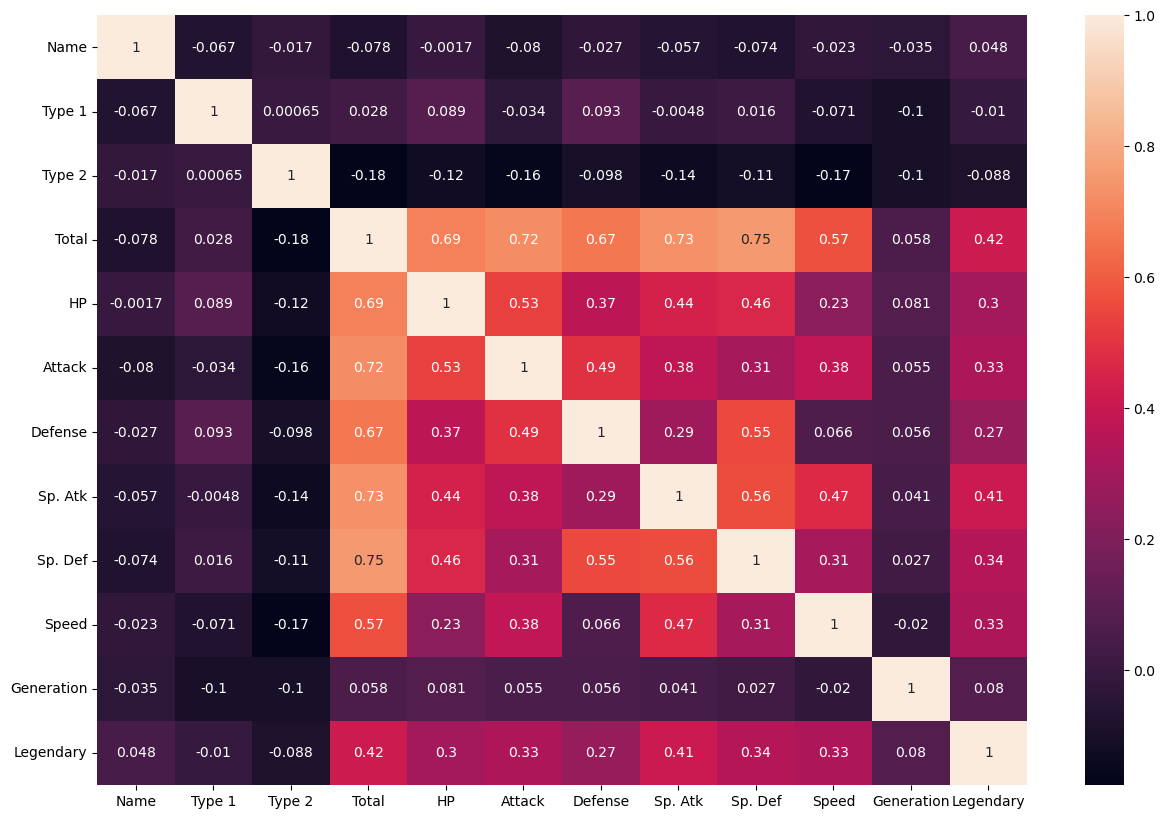

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [76]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [77]:
y.value_counts()

Legendary
0    735
1     65
Name: count, dtype: int64

In [78]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=1)
Xnew,ynew = smote.fit_resample(X,y)

In [79]:
ynew.value_counts()

Legendary
0    735
1    735
Name: count, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(Xnew,ynew,test_size=.2,random_state=42)

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [82]:
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=42)

In [84]:
dt.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [85]:
ypred = dt.predict(Xtest)

In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [87]:
confusion_matrix(ytest,ypred)

array([[131,   5],
       [  3, 155]], dtype=int64)

In [88]:
accuracy_score(ytest,ypred)

0.9727891156462585

In [89]:
ypred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0])

In [90]:
ypred[0]

1

In [91]:
y_test = []
for i in ytest:
    y_test.append(i)

In [92]:
y_test

[1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,


In [93]:
df1 = pd.DataFrame({'Predicted Values': ypred, 'True Values':ytest},index=None)

In [94]:
df1

,Predicted Values,True Values
1041,1,1
184,0,0
1222,1,1
67,0,0
220,0,0
...,...,...
567,0,0
560,0,0
945,1,1
522,0,0
